<a href="https://colab.research.google.com/github/asrulharunismail/Bees-Algorithm-Combinatorial/blob/master/CVRP_of_Basic_BA_Asrul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bees Algorithm with Domino for Capacitated Vehicle Routing Problem** by Asrul Ismail

Combinatorial Optimisation Problem

Reference

[1] Pham D.T., Ghanbarzadeh A., Koc E., Otri S., Rahim S., and Zaidi M. The Bees Algorithm, A Novel Tool for Complex Optimisation Problems. Proc 2nd Int Virtual Conf on Intelligent Production Machines and Systems (IPROMS 2006). 2006. Oxford: Elsevier, pp. 454-459.

[2] Ismail, A. H., Hartono, N., Zeybek, S., & Pham, D. T. Using the Bees Algorithm to solve combinatorial optimisation problems for TSPLIB.

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
val=2 # 1 = Eil33; 2 = Eil51
val = int(val)
LS =0
LS = int(LS)
maxIt =99
maxIt = int(maxIt)
nScoutBee = 40
nScoutBee = int(nScoutBee)

In [3]:
class Model:
    def __init__(self,k,f,r,c,x,y,x0,y0,eta):
        self.k = k
        self.f = f
        self.r = r
        self.c = c
        self.x = x
        self.y = y
        self.x0 = x0
        self.y0 = y0
        self.xmin = min (x+[x0])
        self.xmax = max (x+[x0])
        self.ymin = min (y+[y0])
        self.ymax = max (y+[y0])
        self.eta = eta
        
    def d (self):
        d = []
        for i in range (k):
            for j in range (k):
                d.append(round(np.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2)))
        d=np.array(d)
        d=d.reshape(k,k)
        return d
    def d0 (self):
        d0 = []
        for i in range (k):
            d0.append(round(np.sqrt((x[i] - x0) ** 2 + (y[i] - y0) ** 2)))
        return d0

In [4]:
# Problem Selection
if val == 1:
    Prob = 'Eil33-VRP'
    k = 32
    f = 4
    r = [700,400,400,1200,40,80,2000,900,600,750,1500,150,250,1600,450,700,550,650,200,400,300,1300,700,750,1400,4000,600,1000,500,2500,1700,1100]
    c = [8000,8000,8000,8000]
    x = [298,309,307,336,320,321,322,323,324,323,314,311,304,293,296,261,297,315,314,321,321,314,313,304,295,283,279,271,264,277,290,319]
    y = [427,445,464,475,439,437,437,433,433,429,435,442,427,421,418,384,410,407,406,391,398,394,378,382,402,406,399,401,414,439,434,433]
    x0 = 292
    y0 = 495
    eta = 0.5
    BKS = 835
    Eil33 = Model(k,f,r,c,x,y,x0,y0,eta)
    D=Eil33.d()
    D0=Eil33.d0()
    Probx = Eil33.x
    Proby = Eil33.y
    xmin = Eil33.xmin
    xmax = Eil33.xmax
    ymin = Eil33.ymin
    ymax = Eil33.ymax
    x0 = Eil33.x0
    y0 = Eil33.y0
    n=len(x)
else: 
    Prob = 'Eil51-VRP'
    k = 50
    f = 5
    r = [7,30,16,9,21,15,19,23,11,5,19,29,23,21,10,15,3,41,9,28,8,8,16,10,28,7,15,14,6,19,11,12,23,26,17,6,9,15,14,7,27,13,11,16,10,5,25,17,18,10]
    c = [160,160,160,160,160]
    x = [37,49,52,20,40,21,17,31,52,51,42,31,5,12,36,52,27,17,13,57,62,42,16,8,7,27,30,43,58,58,37,38,46,61,62,63,32,45,59,5,10,21,5,30,39,32,25,25,48,56]
    y = [52,49,64,26,30,47,63,62,33,21,41,32,25,42,16,41,23,33,13,58,42,57,57,52,38,68,48,67,48,27,69,46,10,33,63,69,22,35,15,6,17,10,64,15,10,39,32,55,28,37]
    x0 = 30
    y0 = 40
    eta = 0.5
    BKS = 521
    Eil51 = Model(k,f,r,c,x,y,x0,y0,eta)
    D=Eil51.d()
    D0=Eil51.d0()
    Probx = Eil51.x
    Proby = Eil51.y
    xmin = Eil51.xmin
    xmax = Eil51.xmax
    ymin = Eil51.ymin
    ymax = Eil51.ymax
    x0 = Eil51.x0
    y0 = Eil51.y0
    n=len(x)

In [5]:
def Cost(tour,k,f,D,D0,r,c):
    tour = np.array(tour)
    DelPos = np.argwhere(tour> (k-1))
    fr = np.insert(DelPos+1, 0,0)
    to = np.insert(DelPos-1, len(DelPos),k+f-2) #sebelumnya k+f-1
    DelPos = list(DelPos)
    fr = list(fr)
    to = list(to)
    #for i in range (len(to)):
    #    if to[i]==-1:
    #        to[i]=0
    LL=[]
    for i in range(f):
        LL.append([])
    DD=[]
    for i in range(f):
        DD.append(0)
    UC=[]
    for i in range(f):
        UC.append(0)
    for i in range(f):
        LL[i]=tour[fr[i]:to[i]+1]
        if len(LL[i])!=0:
            DD[i]=D0[LL[i][0]]
            for j in range (len(LL[i])-1):
                DD[i]=DD[i]+D[LL[i][j],LL[i][j+1]]
            DD[i]=DD[i]+D0[LL[i][-1]]
            UC[i]=0
            for a in LL[i]:
                UC[i]=UC[i]+ r[a]
    Udc = list(np.divide(UC,c)-1)
    CUdc = []
    for i in range(f):
        CUdc.append(0)
    
    MaxD = max(DD)
    TotalD = sum(DD)
    UC=UC
    CV = list(map(max,Udc,CUdc))
    MeanCV = np.mean(CV)
    if MeanCV==0:
        IsFeasible = 1
    else:
        IsFeasible = 0

    z=TotalD + (10000*MeanCV)    
        

          #0, 1, 2 , 3 ,   4 , 5,  6 ,  7  ,    8
    return z,LL,DD,MaxD,TotalD,UC,CV,MeanCV,IsFeasible,DelPos,fr,to

In [6]:
def GlobalSearch (k,f):
    IS = np.random.permutation(k+f-1)
    IS = list(IS)
    return IS
    

In [7]:
def LocalSearch (x,LS):   # Random using Reversion, Swap, Insertion
    if LS == 0:
        m = np.random.randint(1, 4) # The Combination of Swap, Reversion, and Insertion
    else:
        m = LS
    x = list (x)
    n = len(x)
    if m == 1: # SWAP
        for i in range(np.random.choice(range(2), 1)[0]):
            i1, i2 = np.random.choice(range(n), 2, False)
            x[i1], x[i2] = x[i2], x[i1]
    elif m == 2: # REVERSION (2-OPT)
        i = np.random.randint(0,n,2)
        i1 = min(i)
        i2 = max(i)
        x=list(x)
        x[i1:i2:1]= reversed(x[i1:i2:1])
    elif m == 3: # INSERTION
        temp = x[np.random.choice(range(n), 1)[0]]
        x=list(x)
        x.remove(temp)
        x.insert(np.random.choice(range(n-1), 1)[0], temp)
    return x


In [8]:
class Bee:
    def __init__(self,Position,Cost,Counter):
        self.Position = Position
        self.Cost = Cost
        self.Counter = Counter

In [9]:
# Setting Parameters of Bees Algorithm
VarSize = [1, n]  # Decision Variables Matrix Size
nSelectedSite = round(0.5 * nScoutBee)  # m = Number of Selected Sites
nEliteSite = round(0.4 * nSelectedSite)  # e = Number of Selected Elite Sites
nSelectedSiteBee = round(0.5 * nScoutBee)  # nsp = Number of Selected Recruited Bees for Selected (m-e) Sites
nEliteSiteBee = 2 * nSelectedSiteBee  # nep = Number of Recruited Bees for Elite Sites
counter = 0 #Number of evaluation function

['Iteration 0: Best Cost = [2413.]**uf']
['Iteration 0: Best Counter = [56.]']


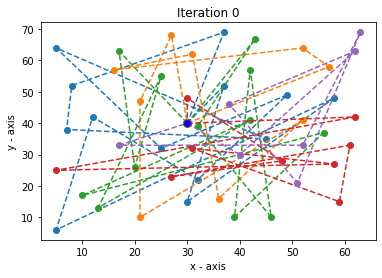

['Iteration 1: Best Cost = [1986.]**uf']
['Iteration 1: Best Counter = [659.]']


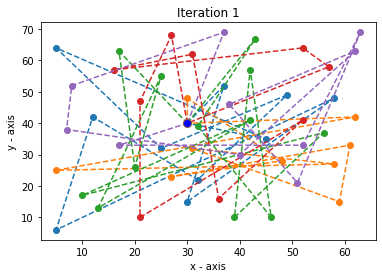

['Iteration 2: Best Cost = [1815.5]**uf']
['Iteration 2: Best Counter = [1256.]']


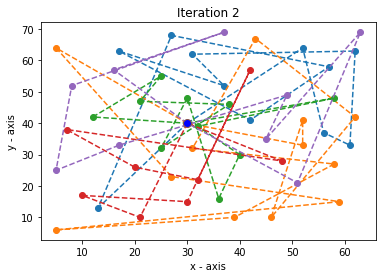

['Iteration 3: Best Cost = [1660.]*f']
['Iteration 3: Best Counter = [1838.]']


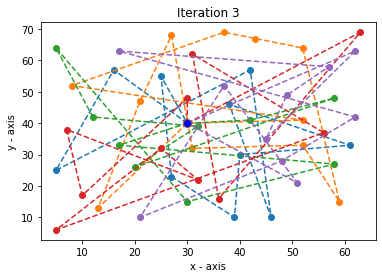

['Iteration 4: Best Cost = [1615.]*f']
['Iteration 4: Best Counter = [2403.]']


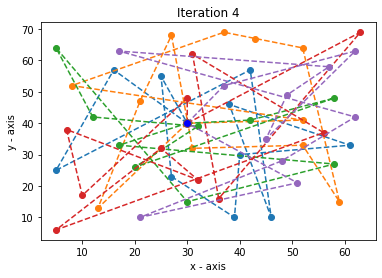

['Iteration 5: Best Cost = [1485.]**uf']
['Iteration 5: Best Counter = [3058.]']


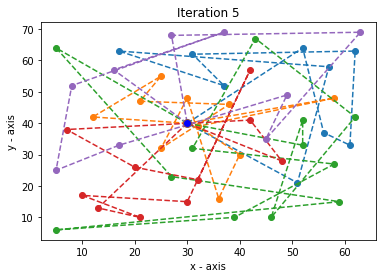

['Iteration 6: Best Cost = [1436.]*f']
['Iteration 6: Best Counter = [3547.]']


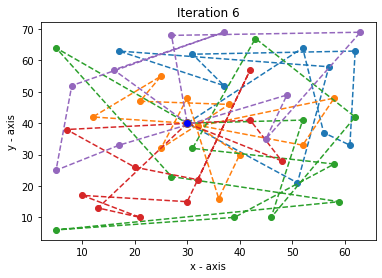

['Iteration 7: Best Cost = [1413.5]**uf']
['Iteration 7: Best Counter = [4204.]']


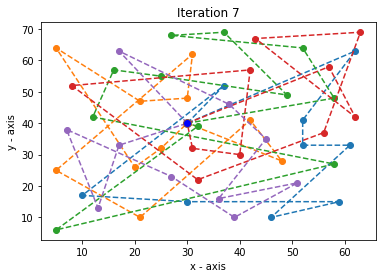

['Iteration 8: Best Cost = [1348.]**uf']
['Iteration 8: Best Counter = [4702.]']


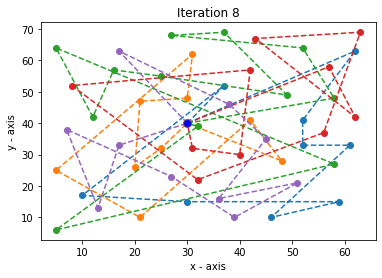

['Iteration 9: Best Cost = [1268.]*f']
['Iteration 9: Best Counter = [5312.]']


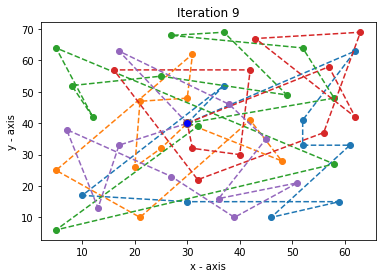

['Iteration 10: Best Cost = [1258.5]**uf']
['Iteration 10: Best Counter = [5855.]']


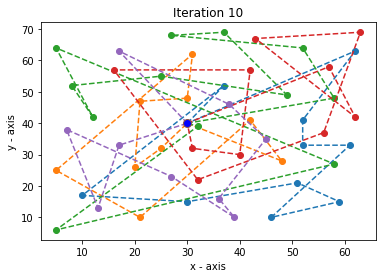

['Iteration 11: Best Cost = [1231.5]**uf']
['Iteration 11: Best Counter = [6433.]']


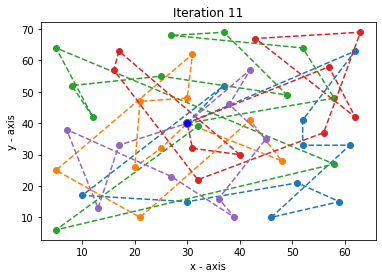

['Iteration 12: Best Cost = [1205.5]**uf']
['Iteration 12: Best Counter = [7019.]']


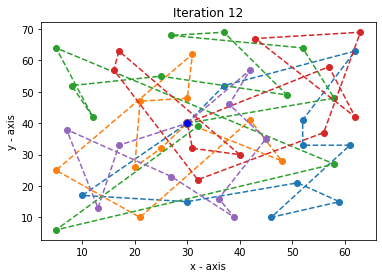

['Iteration 13: Best Cost = [1205.5]**uf']
['Iteration 13: Best Counter = [7019.]']


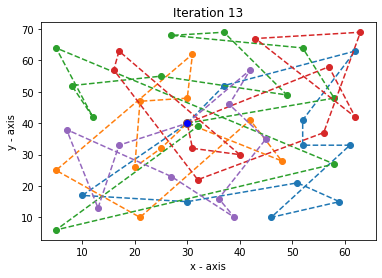

['Iteration 14: Best Cost = [1178.5]**uf']
['Iteration 14: Best Counter = [8163.]']


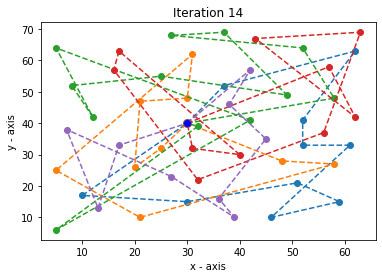

['Iteration 15: Best Cost = [1161.5]**uf']
['Iteration 15: Best Counter = [8746.]']


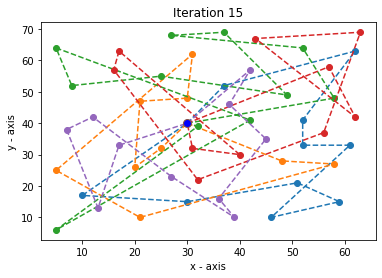

['Iteration 16: Best Cost = [1150.5]**uf']
['Iteration 16: Best Counter = [9329.]']


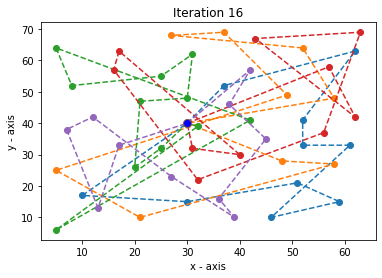

['Iteration 17: Best Cost = [1150.5]**uf']
['Iteration 17: Best Counter = [9329.]']


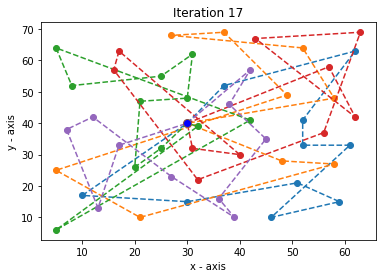

['Iteration 18: Best Cost = [1131.5]**uf']
['Iteration 18: Best Counter = [10490.]']


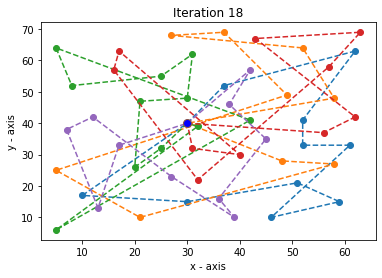

['Iteration 19: Best Cost = [1113.5]**uf']
['Iteration 19: Best Counter = [11088.]']


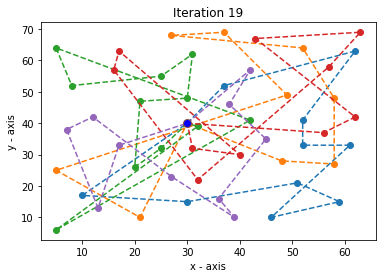

['Iteration 20: Best Cost = [1113.5]**uf']
['Iteration 20: Best Counter = [11088.]']


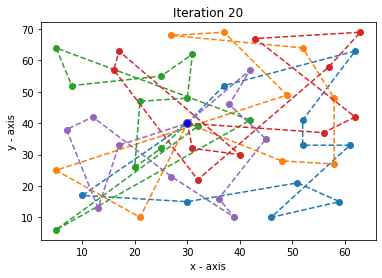

['Iteration 21: Best Cost = [1089.5]**uf']
['Iteration 21: Best Counter = [12234.]']


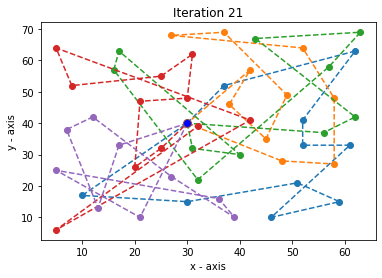

['Iteration 22: Best Cost = [1056.5]**uf']
['Iteration 22: Best Counter = [12839.]']


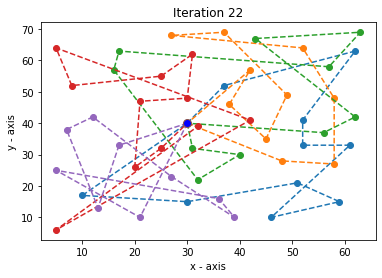

['Iteration 23: Best Cost = [1054.5]**uf']
['Iteration 23: Best Counter = [13399.]']


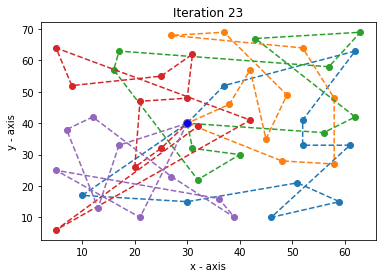

['Iteration 24: Best Cost = [1042.5]**uf']
['Iteration 24: Best Counter = [13972.]']


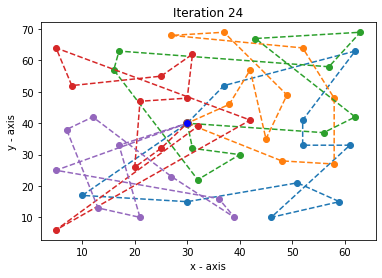

['Iteration 25: Best Cost = [1042.5]**uf']
['Iteration 25: Best Counter = [13972.]']


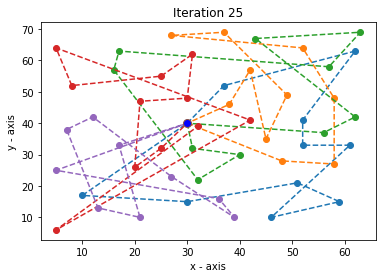

['Iteration 26: Best Cost = [1021.]**uf']
['Iteration 26: Best Counter = [15159.]']


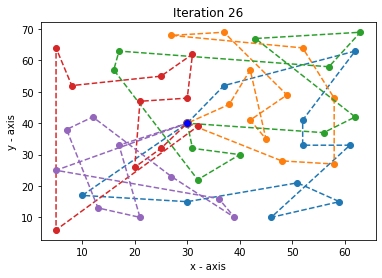

['Iteration 27: Best Cost = [1018.]**uf']
['Iteration 27: Best Counter = [15726.]']


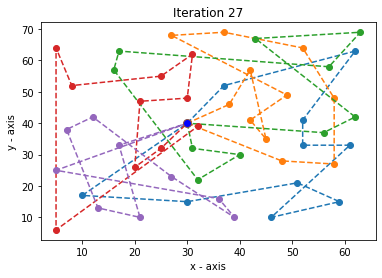

['Iteration 28: Best Cost = [1018.]**uf']
['Iteration 28: Best Counter = [15726.]']


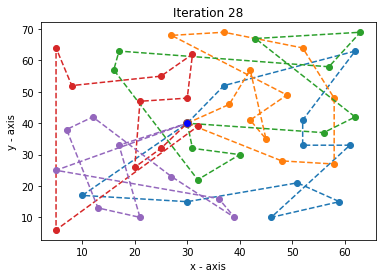

['Iteration 29: Best Cost = [1012.]**uf']
['Iteration 29: Best Counter = [16867.]']


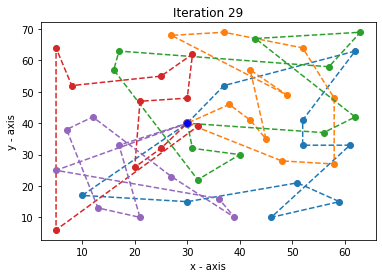

['Iteration 30: Best Cost = [1012.]**uf']
['Iteration 30: Best Counter = [16867.]']


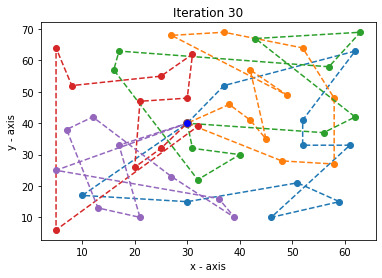

['Iteration 31: Best Cost = [994.]**uf']
['Iteration 31: Best Counter = [18054.]']


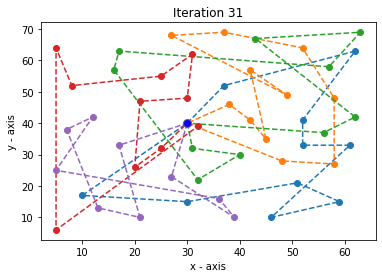

['Iteration 32: Best Cost = [989.]**uf']
['Iteration 32: Best Counter = [18628.]']


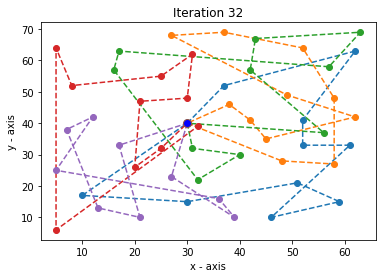

['Iteration 33: Best Cost = [949.5]**uf']
['Iteration 33: Best Counter = [19181.]']


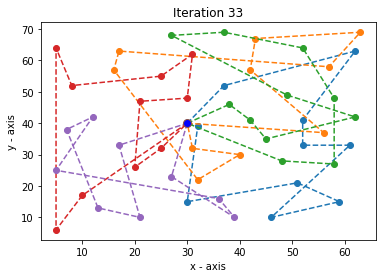

['Iteration 34: Best Cost = [949.5]**uf']
['Iteration 34: Best Counter = [19181.]']


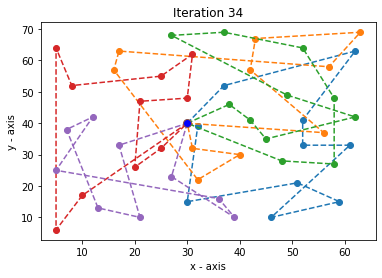

['Iteration 35: Best Cost = [947.5]**uf']
['Iteration 35: Best Counter = [20356.]']


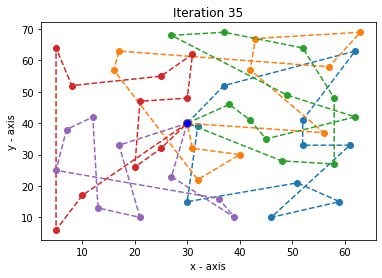

['Iteration 36: Best Cost = [947.5]**uf']
['Iteration 36: Best Counter = [20356.]']


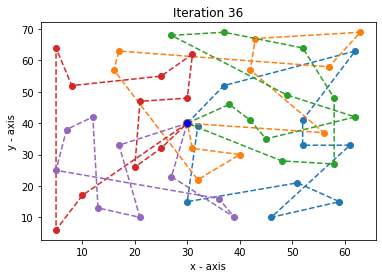

['Iteration 37: Best Cost = [921.]*f']
['Iteration 37: Best Counter = [21522.]']


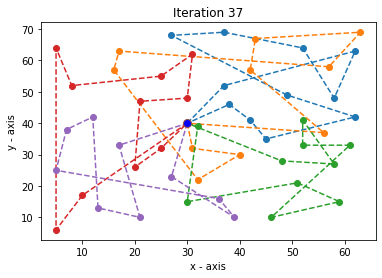

['Iteration 38: Best Cost = [921.]*f']
['Iteration 38: Best Counter = [21522.]']


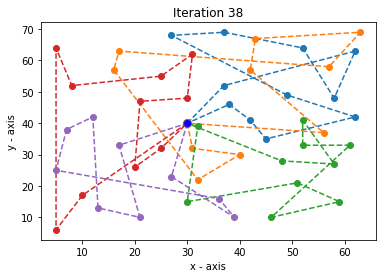

['Iteration 39: Best Cost = [921.]*f']
['Iteration 39: Best Counter = [21522.]']


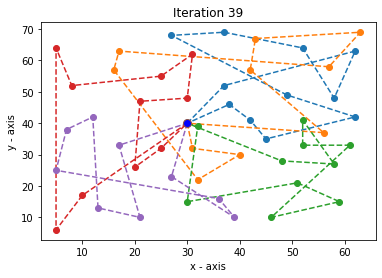

['Iteration 40: Best Cost = [907.]*f']
['Iteration 40: Best Counter = [23276.]']


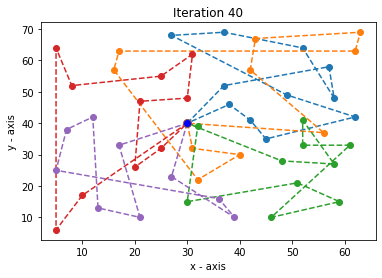

['Iteration 41: Best Cost = [907.]*f']
['Iteration 41: Best Counter = [23276.]']


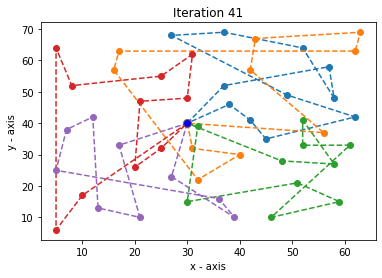

['Iteration 42: Best Cost = [907.]*f']
['Iteration 42: Best Counter = [23276.]']


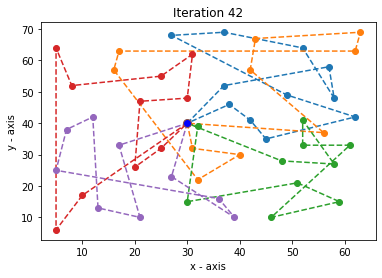

['Iteration 43: Best Cost = [904.]*f']
['Iteration 43: Best Counter = [24990.]']


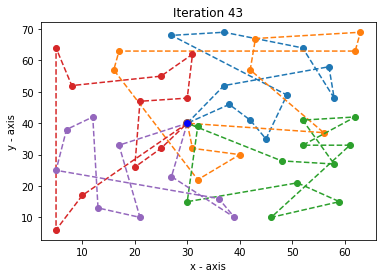

['Iteration 44: Best Cost = [904.]*f']
['Iteration 44: Best Counter = [24990.]']


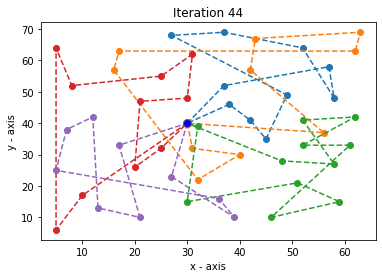

['Iteration 45: Best Cost = [904.]*f']
['Iteration 45: Best Counter = [24990.]']


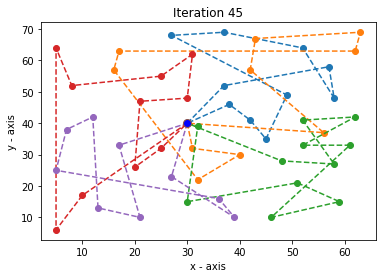

['Iteration 46: Best Cost = [898.]*f']
['Iteration 46: Best Counter = [26730.]']


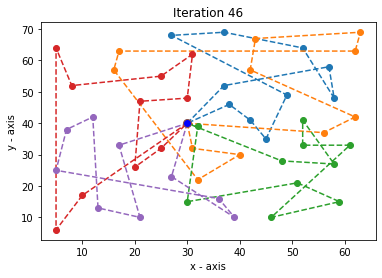

['Iteration 47: Best Cost = [891.]*f']
['Iteration 47: Best Counter = [27302.]']


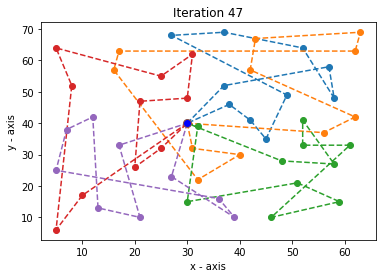

['Iteration 48: Best Cost = [891.]*f']
['Iteration 48: Best Counter = [27302.]']


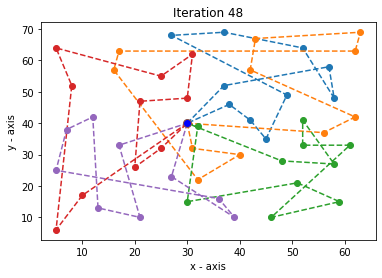

['Iteration 49: Best Cost = [891.]*f']
['Iteration 49: Best Counter = [27302.]']


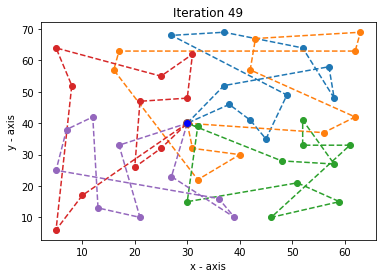

['Iteration 50: Best Cost = [891.]*f']
['Iteration 50: Best Counter = [27302.]']


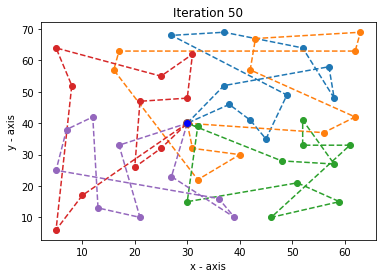

['Iteration 51: Best Cost = [891.]*f']
['Iteration 51: Best Counter = [27302.]']


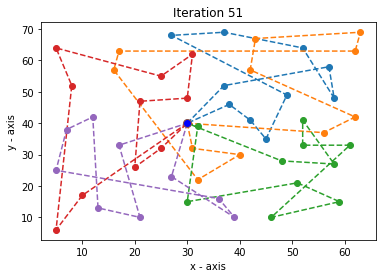

['Iteration 52: Best Cost = [891.]*f']
['Iteration 52: Best Counter = [27302.]']


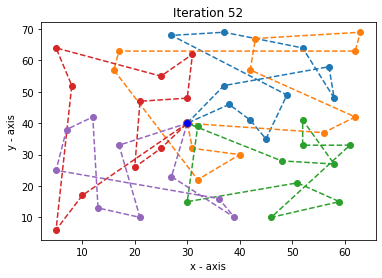

['Iteration 53: Best Cost = [889.]*f']
['Iteration 53: Best Counter = [30801.]']


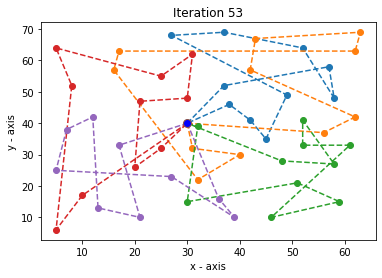

['Iteration 54: Best Cost = [880.]*f']
['Iteration 54: Best Counter = [31398.]']


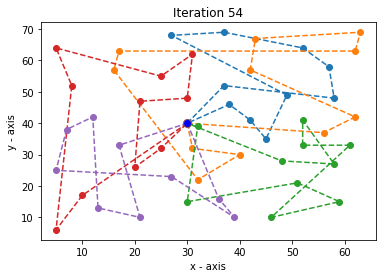

['Iteration 55: Best Cost = [880.]*f']
['Iteration 55: Best Counter = [31398.]']


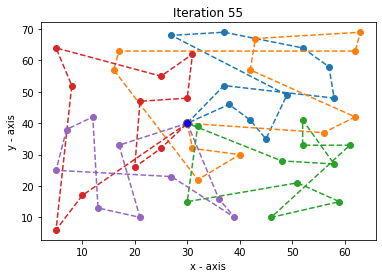

['Iteration 56: Best Cost = [880.]*f']
['Iteration 56: Best Counter = [31398.]']


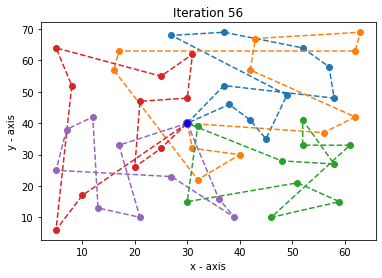

['Iteration 57: Best Cost = [877.]*f']
['Iteration 57: Best Counter = [33138.]']


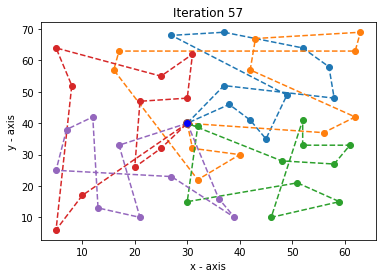

['Iteration 58: Best Cost = [866.]*f']
['Iteration 58: Best Counter = [33689.]']


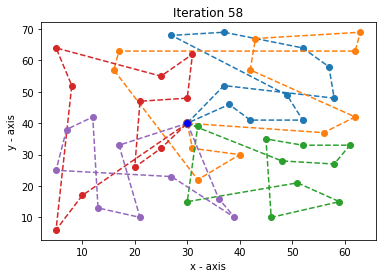

['Iteration 59: Best Cost = [866.]*f']
['Iteration 59: Best Counter = [33689.]']


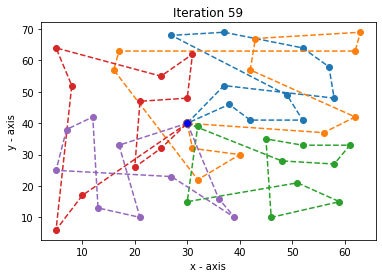

['Iteration 60: Best Cost = [866.]*f']
['Iteration 60: Best Counter = [33689.]']


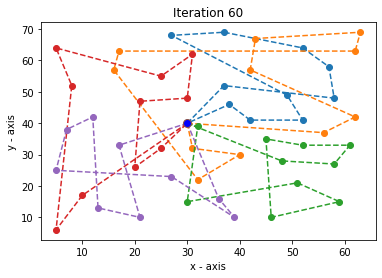

['Iteration 61: Best Cost = [866.]*f']
['Iteration 61: Best Counter = [33689.]']


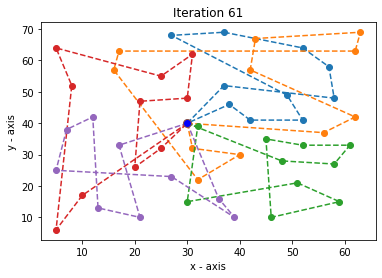

['Iteration 62: Best Cost = [864.]*f']
['Iteration 62: Best Counter = [36079.]']


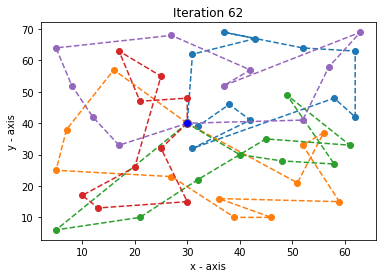

['Iteration 63: Best Cost = [861.]*f']
['Iteration 63: Best Counter = [36643.]']


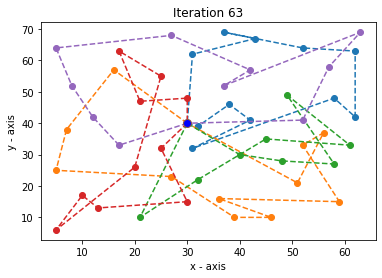

['Iteration 64: Best Cost = [861.]*f']
['Iteration 64: Best Counter = [36643.]']


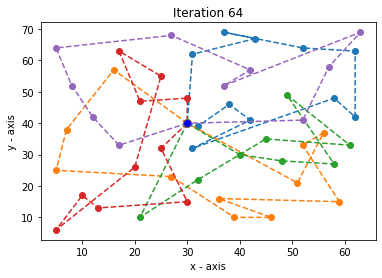

['Iteration 65: Best Cost = [860.]*f']
['Iteration 65: Best Counter = [37852.]']


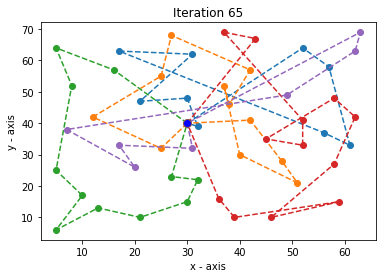

['Iteration 66: Best Cost = [859.]*f']
['Iteration 66: Best Counter = [38388.]']


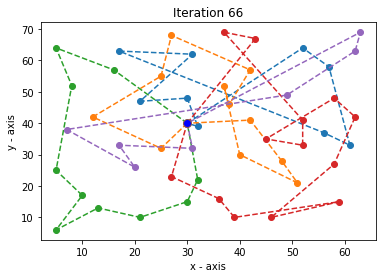

['Iteration 67: Best Cost = [859.]*f']
['Iteration 67: Best Counter = [38388.]']


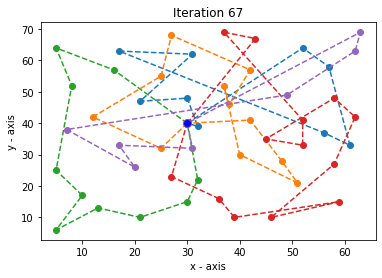

['Iteration 68: Best Cost = [836.]*f']
['Iteration 68: Best Counter = [39510.]']


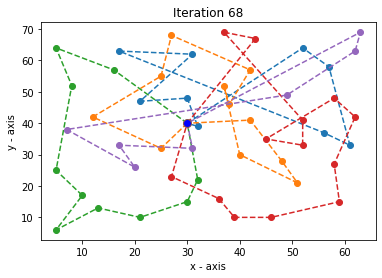

['Iteration 69: Best Cost = [836.]*f']
['Iteration 69: Best Counter = [39510.]']


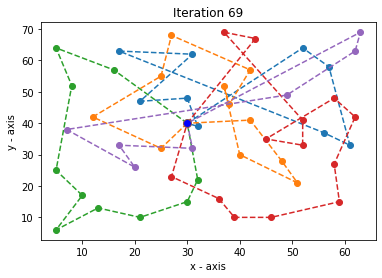

['Iteration 70: Best Cost = [834.]*f']
['Iteration 70: Best Counter = [40665.]']


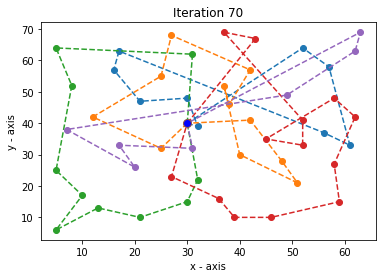

['Iteration 71: Best Cost = [823.]*f']
['Iteration 71: Best Counter = [41237.]']


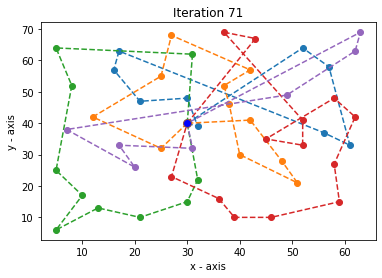

['Iteration 72: Best Cost = [823.]*f']
['Iteration 72: Best Counter = [41237.]']


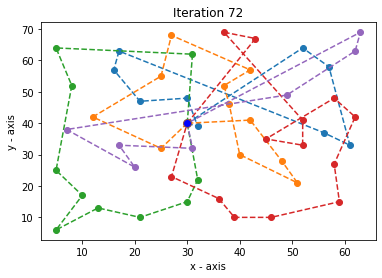

['Iteration 73: Best Cost = [820.]*f']
['Iteration 73: Best Counter = [42395.]']


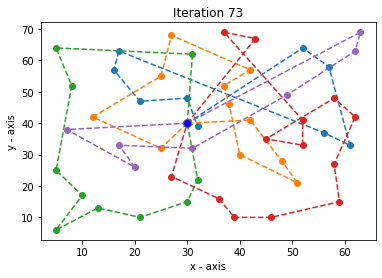

['Iteration 74: Best Cost = [820.]*f']
['Iteration 74: Best Counter = [42395.]']


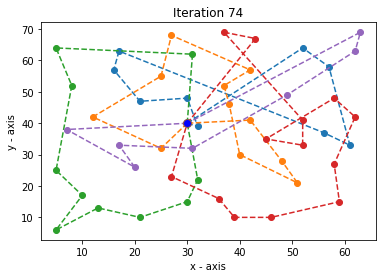

['Iteration 75: Best Cost = [819.]*f']
['Iteration 75: Best Counter = [43578.]']


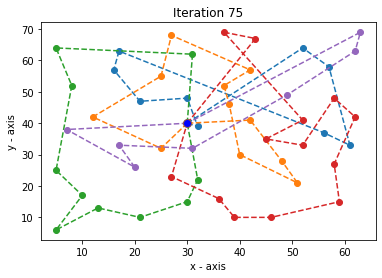

['Iteration 76: Best Cost = [819.]*f']
['Iteration 76: Best Counter = [43578.]']


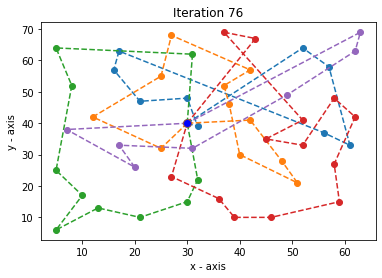

['Iteration 77: Best Cost = [819.]*f']
['Iteration 77: Best Counter = [43578.]']


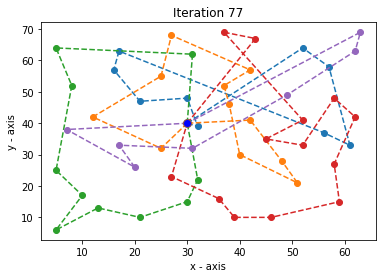

['Iteration 78: Best Cost = [811.]*f']
['Iteration 78: Best Counter = [45295.]']


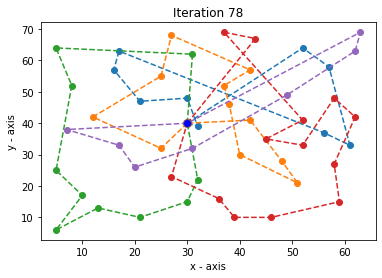

['Iteration 79: Best Cost = [807.]*f']
['Iteration 79: Best Counter = [45876.]']


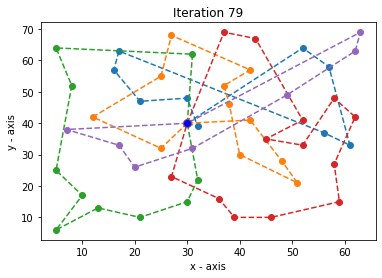

['Iteration 80: Best Cost = [788.]*f']
['Iteration 80: Best Counter = [46470.]']


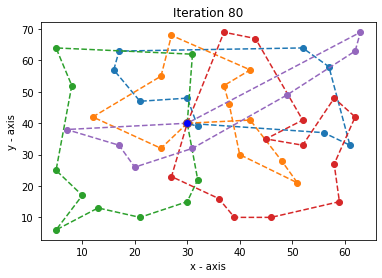

['Iteration 81: Best Cost = [788.]*f']
['Iteration 81: Best Counter = [46470.]']


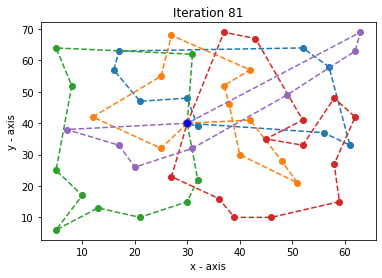

['Iteration 82: Best Cost = [788.]*f']
['Iteration 82: Best Counter = [46470.]']


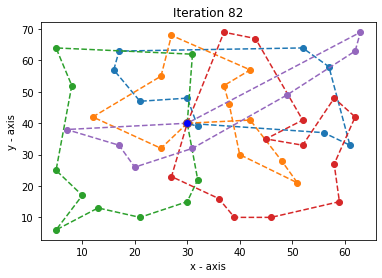

['Iteration 83: Best Cost = [788.]*f']
['Iteration 83: Best Counter = [46470.]']


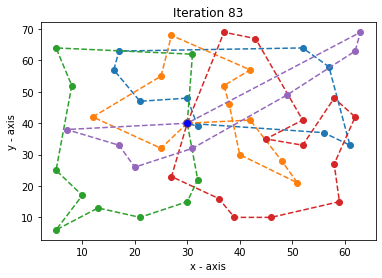

['Iteration 84: Best Cost = [788.]*f']
['Iteration 84: Best Counter = [46470.]']


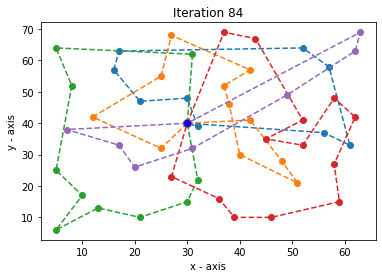

['Iteration 85: Best Cost = [788.]*f']
['Iteration 85: Best Counter = [46470.]']


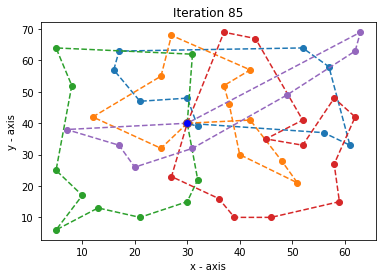

['Iteration 86: Best Cost = [788.]*f']
['Iteration 86: Best Counter = [46470.]']


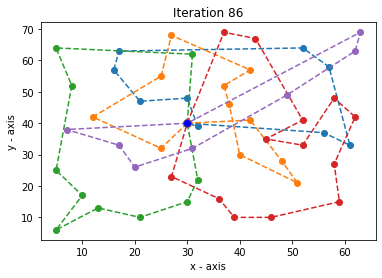

['Iteration 87: Best Cost = [788.]*f']
['Iteration 87: Best Counter = [46470.]']


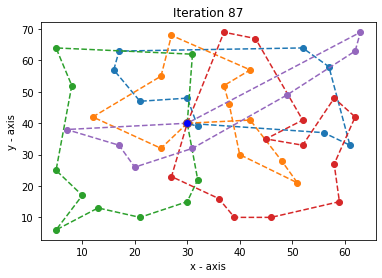

['Iteration 88: Best Cost = [788.]*f']
['Iteration 88: Best Counter = [46470.]']


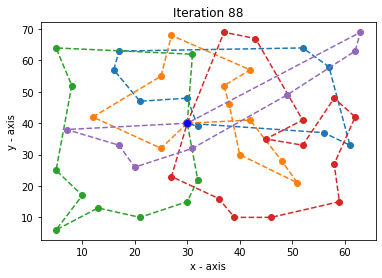

['Iteration 89: Best Cost = [788.]*f']
['Iteration 89: Best Counter = [46470.]']


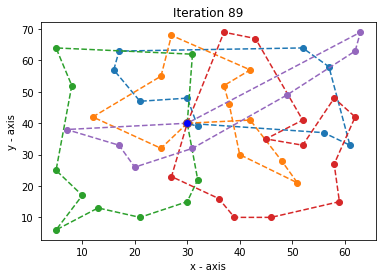

['Iteration 90: Best Cost = [788.]*f']
['Iteration 90: Best Counter = [46470.]']


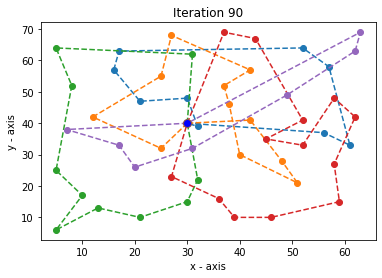

['Iteration 91: Best Cost = [788.]*f']
['Iteration 91: Best Counter = [46470.]']


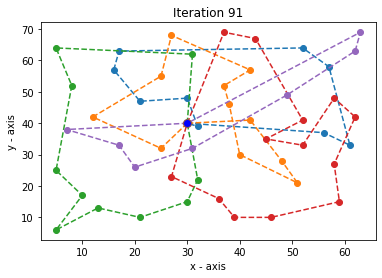

['Iteration 92: Best Cost = [788.]*f']
['Iteration 92: Best Counter = [46470.]']


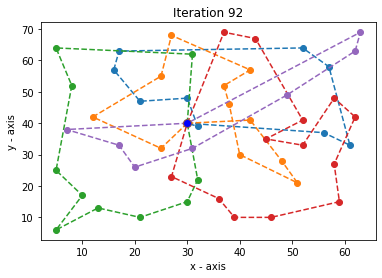

['Iteration 93: Best Cost = [788.]*f']
['Iteration 93: Best Counter = [46470.]']


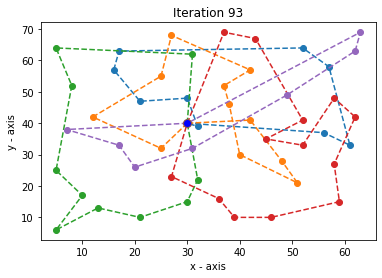

['Iteration 94: Best Cost = [788.]*f']
['Iteration 94: Best Counter = [46470.]']


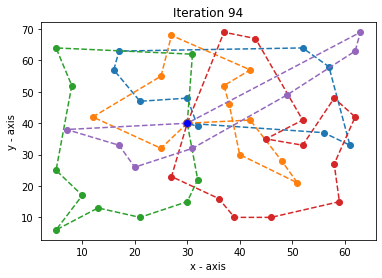

['Iteration 95: Best Cost = [788.]*f']
['Iteration 95: Best Counter = [46470.]']


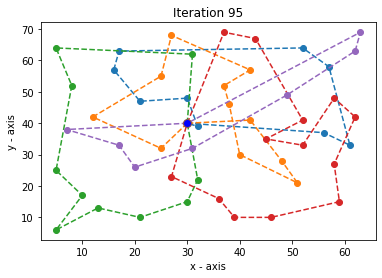

['Iteration 96: Best Cost = [786.]*f']
['Iteration 96: Best Counter = [55787.]']


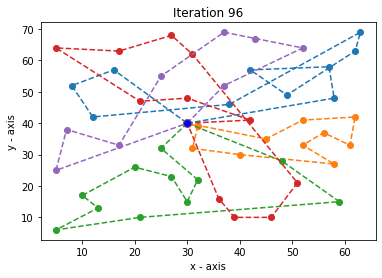

['Iteration 97: Best Cost = [772.]*f']
['Iteration 97: Best Counter = [56340.]']


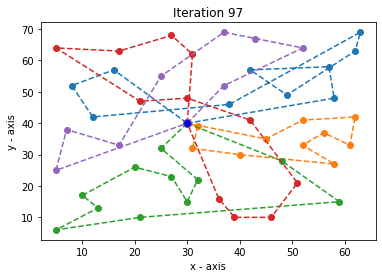

['Iteration 98: Best Cost = [770.]*f']
['Iteration 98: Best Counter = [56945.]']


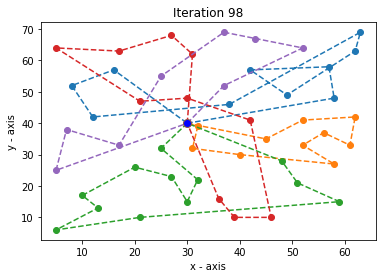

In [10]:
# Initialization
bee=[]
for i in range(nScoutBee):
    bee.append([])
    tour = GlobalSearch (k,f)
    tour = np.array(tour)
    bee[i]=Bee(tour,Cost(tour,k,f,D,D0,r,c,)[0],counter)
    counter += 1
bee.sort(key=lambda bee: bee.Cost, reverse=False)

BestSol = ([],math.inf)
BestSol = bee[0]

BestCost = np.zeros([maxIt,1])
BestPos = []
Counter = np.zeros([maxIt*maxIt,1])
for i in range(maxIt):
    BestPos.append([])

newbee=Bee([],[],[])

# Main Loop
for it in range(maxIt):
    # Elite Sites
    for i in range(nEliteSite):

        bestnewbee=Bee([],math.inf,math.inf)

        for j in range(nEliteSiteBee):
            newbee.Position = LocalSearch(bee[i].Position, LS)
            newbee.Cost = Cost(newbee.Position,k,f,D,D0,r,c)[0]
            counter += 1
            if newbee.Cost < bestnewbee.Cost:
                bestnewbee.Cost = newbee.Cost
                bestnewbee.Position = newbee.Position
                bestnewbee.Counter = counter

        if bestnewbee.Cost < bee[i].Cost:
            bee[i].Cost = bestnewbee.Cost
            bee[i].Position = bestnewbee.Position
            bee[i].Counter = bestnewbee.Counter

    # Selected Non-Elite Sites
    for i in range(nEliteSite,nSelectedSite):

        bestnewbee=Bee([],math.inf,math.inf)

        for j in range(nSelectedSiteBee):
            newbee.Position = LocalSearch(bee[i].Position, LS) #np.random.choice([1,2]))
            newbee.Cost = Cost(newbee.Position,k,f,D,D0,r,c)[0]
            counter += 1
            if newbee.Cost < bestnewbee.Cost:
                bestnewbee.Cost = newbee.Cost
                bestnewbee.Position = newbee.Position
                bestnewbee.Counter = counter

        if bestnewbee.Cost < bee[i].Cost:
            bee[i].Cost = bestnewbee.Cost
            bee[i].Position = bestnewbee.Position
            bee[i].Counter = bestnewbee.Counter

    # Non - Selected Sites
    for i in range(nSelectedSite,nScoutBee):
        tour = GlobalSearch (k,f)
        tour = np.array(tour)
        bee[i]=Bee(tour,Cost(tour,k,f,D,D0,r,c)[0],counter)
        counter += 1

    # Sort
    bee.sort(key=lambda bee: bee.Cost, reverse=False)

    # Update
    BestSol.Cost = bee[0].Cost
    BestSol.Position = bee[0].Position
    BestSol.Counter = bee[0].Counter

    # Store Best Cost ever found
    BestPos [it] = BestSol.Position
    BestCost[it] = Cost(BestSol.Position,k,f,D,D0,r,c)[0]
    Counter [it] = BestSol.Counter

   ## Drawing the solutions 
    # x and y axis values 
    tour = BestSol.Position
    tour = list(tour)
    TOUR = Cost (tour,k,f,D,D0,r,c)
    
    if TOUR[8]==1:
        G='*f'
    else:
        G='**uf'
    
    # Display Iteration Information
    print(['Iteration ' + str(it) + ': Best Cost = ' + str(BestCost[it])+ str(G)])
    print(['Iteration ' + str(it) + ': Best Counter = ' + str(Counter [it])])
    #cols=['red','orange','yellow','green','blue','purple']
    
    tx=[]
    ty=[]
    for i in range(f):
        tx.append([])
        ty.append([])
    for i in range(f):
        tx[i].append(x0)
        ty[i].append(y0)
        cl=range(1,100,10)
        for j in TOUR[1][i]:
            if len(TOUR[1][i])==0:
                continue
            tx[i].append(Probx[j])
            ty[i].append(Proby[j])
        tx[i].append(x0)
        ty[i].append(y0)
    
    for i in range(f):    
        plt.plot(tx[i], ty[i], linestyle='dashed', linewidth = 1.5, 
                 marker='o', markersize=6) #markerfacecolor='red', markersize=6)
        

    plt.plot(x0, y0, linestyle='dashed', linewidth = 1.5, 
                 marker='o', markerfacecolor='blue', markersize=8)
    plt.xlabel('x - axis') 
    plt.ylabel('y - axis') 
    plt.title("Iteration " + str(it)) 
    plt.show()

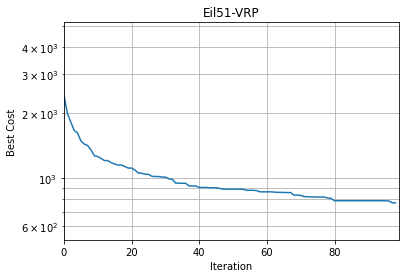

521
[770.]
[28, 19, 21, 1, 34, 35, 31, 13, 23, 22, 50, 37, 15, 20, 33, 49, 8, 29, 4, 11, 45, 51, 46, 36, 43, 16, 3, 40, 18, 39, 41, 38, 9, 48, 53, 7, 25, 6, 42, 5, 26, 10, 32, 44, 14, 52, 0, 2, 27, 30, 47, 17, 24, 12]
Number of fitness evaluation function: [56945.]


In [11]:
import matplotlib.pyplot as plot
Y = BestCost
X = []
for i in range(len(Y)):
    X.append(i)
# Display grid
plot.grid(True, which="both")
# Linear X axis, Logarithmic Y axis
plot.semilogy(X, Y)
plot.ylim([BKS, BKS*10])
plot.xlim([0, X.__len__()])
# Provide the title for the semilog plot
plot.title(Prob)
plot.xlabel('Iteration')
plot.ylabel('Best Cost')
plot.show()

print(BKS)
print(BestCost[it])
print(BestPos [it])
print("Number of fitness evaluation function:", Counter [it])